<a href="https://colab.research.google.com/github/dmklee/nuro-arm/blob/main/nuro-arm-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone and install github repo


In [1]:
!git clone https://github.com/dmklee/nuro-arm.git
!pip install nuro-arm/

Cloning into 'nuro-arm'...
remote: Enumerating objects: 2162, done.
remote: Counting objects: 100% (619/619), done.
remote: Compressing objects: 100% (440/440), done.
remote: Total 2162 (delta 377), reused 386 (delta 170), pack-reused 1543
Receiving objects: 100% (2162/2162), 35.12 MiB | 19.61 MiB/s, done.
Resolving deltas: 100% (1313/1313), done.
Processing ./nuro-arm
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 79.0 MB 33 kB/s 
  Created wheel for nuro-arm: filename=nuro_arm-0.0.1-py3-none-any.whl size=3863148 sha256=f54a3c5eb44ac6acb5ceeff49361cd5e223d02c34c88acc77dd257287f077e4b
  Stored in directo

### Helper functions for visualization

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

def show_video(video):
  fig = plt.figure()
  im = plt.imshow(video[0])
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.close()

  def animate(i):
    im.set_data(video[i])

  anim = animation.FuncAnimation(fig, animate, frames=len(video), interval=50)
  return HTML(anim.to_html5_video())

def show_image(image):
  fig = plt.figure()
  im = plt.imshow(image)
  plt.axis('off')
  plt.tight_layout(pad=0)

# pose matrix for camera that looks upon scene from side
side_view_pose_mtx = np.array([[-0.866, 0.3214,-0.3830, 0.3264],
                               [-0.5, -0.5567, 0.663, -0.351],
                               [-0, -0.766, -0.6428, 0.514],
                               [0, 0, 0, 1]])

# Create simulated robot

In [42]:
import pybullet
pybullet.disconnect()

In [43]:
from nuro_arm import RobotArm, Camera, Cube

robot = RobotArm('sim')
side_view_camera = Camera('sim', pose_mtx=side_view_pose_mtx)
camera = Camera('sim')

cube_size = 0.03
cube = Cube(pos=[0.15, 0.005, cube_size/2], size=cube_size, tag_id=0)

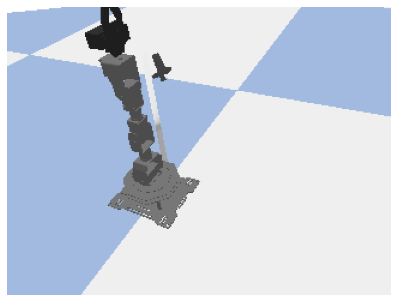

In [44]:
# visualize the scene
image = side_view_camera.get_image()
show_image(image)

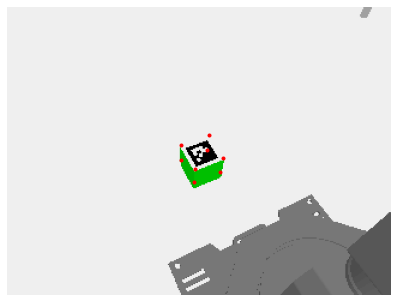

In [45]:
# detect cube with aruco tag
detected_cube = camera.find_cubes(cube_size=cube_size, tag_size=0.75*cube_size)[0]

# show image with cube vertices highlighted
image = camera.get_image()
show_image(image)
pixel_vertices = camera.project_world_points(detected_cube.vertices)
for v in pixel_vertices:
  plt.plot(*v, 'r.')

In [46]:
# picking up the cube
side_view_camera.start_recording(1)

robot.open_gripper()
robot.move_hand_to( detected_cube.pos )
# robot.move_hand_to( cube.get_position() )
robot.close_gripper()
robot.home()

video = side_view_camera.wait_for_recording()

In [47]:
show_video(video)